In [146]:
import numpy as np
import cv2
import os 
import pandas as pd
from random import sample

from sklearn.model_selection import train_test_split

from sklearn import svm, metrics

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

In [123]:
path = r"C:\Users\khaldoun\Desktop\final project\input\5k_diagnosis"
df = pd.read_csv(os.path.join(path, "full_df.csv"))
#df = df.head(200)

In [124]:
file_names = []
labels = []

for text, label, file_name in zip(df["Left-Diagnostic Keywords"], df["C"], df["Left-Fundus"]):
    
    if(("cataract" in text) and (label == 1)):
        file_names.append(file_name)
        labels.append(1)
    
    elif(("normal fundus" in text) and (label == 0)):
        file_names.append(file_name)
        labels.append(0)
        
for text, label, file_name in zip(df["Right-Diagnostic Keywords"], df["C"], df["Right-Fundus"]):
    
    if(("cataract" in text) and (label == 1)):
        file_names.append(file_name)
        labels.append(1)
    
    elif(("normal fundus" in text) and (label == 0)):
        file_names.append(file_name)
        labels.append(0)

print(len(file_names), len(labels))
    

6162 6162


In [125]:
ROW = 224
COL = 224

In [126]:
image_data = []
for idx, image_name in enumerate(file_names):
    
    img = cv2.imread(os.path.join(path,"preprocessed_images",image_name))
    try:
        img = cv2.resize(img, (ROW, COL))
        image_data.append(img)
    except:
        del labels[idx]
    
image_data = np.array(image_data)

print(image_data.shape)

(6078, 224, 224, 3)


(1178, 224, 224, 3) (1178, 1)


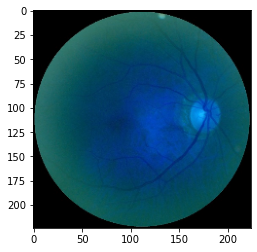

In [134]:
temp = []
for idx, label in enumerate(labels):
    if label == 0:
        temp.append(idx)

temp = sample(temp, len([label for label in labels if label == 1]))

X_data = []
y_data = []

for idx in temp:
    X_data.append(image_data[idx])
    y_data.append(labels[idx])

temp = []
for idx, label in enumerate(labels):
    if label == 1:
        temp.append(idx)
        
for idx in temp:
    X_data.append(image_data[idx])
    y_data.append(labels[idx])

X_data = np.array(X_data)
    
y_data = np.array(y_data)
y_data = np.expand_dims(y_data, axis = -1)
print(X_data.shape, y_data.shape)

plt.imshow(X_data[1])

In [135]:
len(y_data)

X_data = X_data.reshape((len(y_data), -1))

print(X_data.shape)

(1178, 150528)


In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle = True, random_state = 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(942, 150528) (942, 1)
(236, 150528) (236, 1)


In [137]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

In [138]:
classifier.fit(X_train,y_train)

C:\Users\khaldoun\.conda\envs\khaldoun1\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(gamma=0.001)

In [139]:
# Now predict the value of the digit on the second half:
expected = y_test
predicted = classifier.predict(X_test)

In [140]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       128
           1       0.97      0.68      0.80       108

    accuracy                           0.84       236
   macro avg       0.88      0.83      0.83       236
weighted avg       0.87      0.84      0.84       236


Confusion matrix:
[[126   2]
 [ 35  73]]


In [143]:
classifier = KNeighborsClassifier(3)

In [144]:
classifier.fit(X_train,y_train)

# Now predict the value of the digit on the second half:
expected = y_test
predicted = classifier.predict(X_test)

C:\Users\khaldoun\.conda\envs\khaldoun1\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [145]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       0.78      0.48      0.60       128
           1       0.58      0.83      0.68       108

    accuracy                           0.64       236
   macro avg       0.68      0.66      0.64       236
weighted avg       0.68      0.64      0.64       236


Confusion matrix:
[[62 66]
 [18 90]]


In [147]:
classifier = RandomForestClassifier(max_depth=5, n_estimators=10)

In [148]:
classifier.fit(X_train,y_train)

# Now predict the value of the digit on the second half:
expected = y_test
predicted = classifier.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

C:\Users\khaldoun\.conda\envs\khaldoun1\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Classification report for classifier RandomForestClassifier(max_depth=5, n_estimators=10):
              precision    recall  f1-score   support

           0       0.83      0.71      0.76       128
           1       0.71      0.82      0.76       108

    accuracy                           0.76       236
   macro avg       0.77      0.77      0.76       236
weighted avg       0.77      0.76      0.76       236


Confusion matrix:
[[91 37]
 [19 89]]
